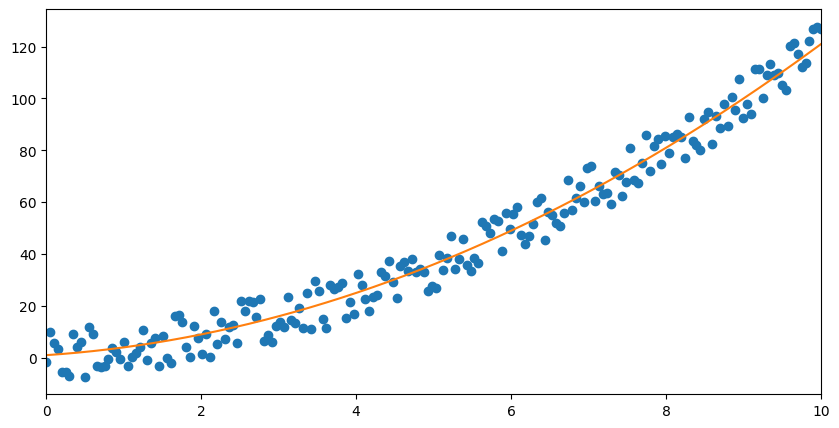

In [1]:
def f(x):
    return x**2 + 2*x + 1

# Plot using matplotlib
import matplotlib.pyplot as plt
import numpy as np
import random

# Define the true function
def f(x):
    return x**2 + 2*x + 1

# Generate data
np.random.seed(42)
x = np.linspace(0, 10, 200)
y_true = f(x)
y_data = y_true + np.random.uniform(-10, 10, size=x.shape)
plt.figure(figsize=(10, 5))
# Plot from 0 to 10
plt.xlim(0, 10)
plt.plot(x, y_data, 'o')
plt.plot(x, y_true)

# Save to figure1.png
plt.savefig('fig1.png')

plt.show()

In [2]:
# Linear model
def linear_model(x, w, b):
    return w * x + b

In [3]:
import random 

# Initialize parameters
w = random.uniform(-1, 1)  # Random initial weight
b = random.uniform(-1, 1)  # Random initial bias

print(f'Initial weight: {w}')
print(f'Initial bias: {b}')

Initial weight: -0.21299332372819757
Initial bias: -0.7532380921958663


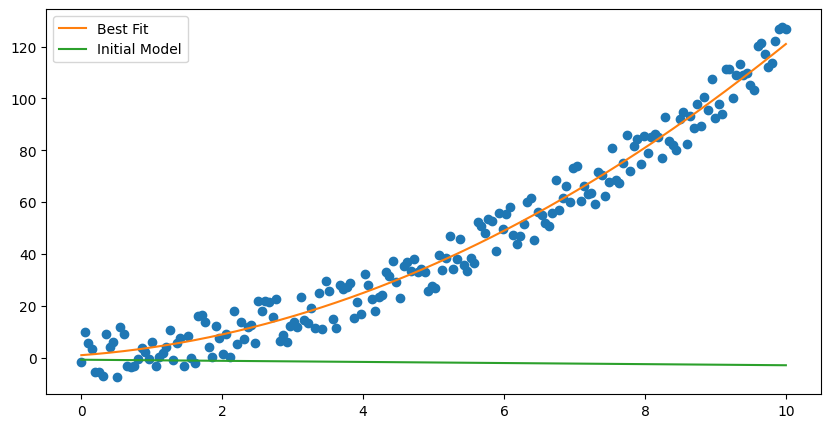

In [4]:
# Linear model
def linear_model(x, w, b):
    return w * x + b

y_pred = [linear_model(p, w, b) for p in x]

plt.figure(figsize=(10, 5))
plt.plot(x, y_data, 'o')
plt.plot(x, y_true, label='Best Fit')
plt.plot(x, y_pred, label='Initial Model')
plt.legend()
# Create landscape 
plt.savefig('fig2.png')
plt.show()

In [5]:
# Mean Squared Error Loss
def mse_loss(y_pred, y_true):
    return np.mean((y_pred - y_true)**2)

print(f'50th sample target: {y_data[50]}')
print(f'50th prediction: {y_pred[50]}')
print(f'Loss at 50th sample: {mse_loss(y_pred[50], y_data[50])}')

print('Total Loss over all samples:', mse_loss(np.array(y_pred), np.array(y_data)))

50th sample target: 21.729790078081002
50th prediction: -1.2883971970405839
Loss at 50th sample: 529.8369454325693
Total Loss over all samples: 3485.837693509094


In [6]:
# Compute gradients
def compute_gradients(x, y_true, w, b):
    y_pred = linear_model(x, w, b)
    error = y_pred - y_true
    dw = 2 * np.mean(error * x)
    db = 2 * np.mean(error)
    return dw, db

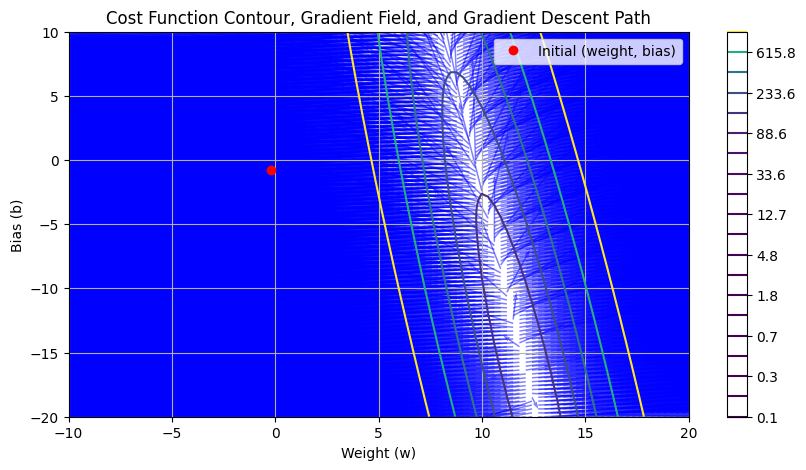

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Gradient Descent parameters
alpha = 0.001  # Learning rate
epochs = 1000  # Number of iterations

# Create a grid of w and b values for contour and quiver plotting
w_vals = np.linspace(-10, 20, 100)
b_vals = np.linspace(-20, 10, 100)
W, B = np.meshgrid(w_vals, b_vals)

# Compute the loss for each combination of w and b in the grid
Z = np.array([mse_loss(linear_model(x, w, b), y_data) for w, b in zip(np.ravel(W), np.ravel(B))])
Z = Z.reshape(W.shape)

# Compute the gradient field
dW = np.zeros(W.shape)
dB = np.zeros(B.shape)
for i in range(W.shape[0]):
    for j in range(W.shape[1]):
        dw, db = compute_gradients(x, y_data, W[i, j], B[i, j])
        dW[i, j] = dw
        dB[i, j] = db

# Plot the cost function contour, gradient field, and gradient descent path
plt.figure(figsize=(10, 5))

# Contour plot of the loss function
cp = plt.contour(W, B, Z, levels=np.logspace(-1, 3, 20), cmap='viridis')
plt.colorbar(cp)
plt.xlabel('Weight (w)')
plt.ylabel('Bias (b)')
plt.title('Cost Function Contour, Gradient Field, and Gradient Descent Path')

# Quiver plot of the gradient field
plt.quiver(W, B, dW, dB, angles='xy', scale_units='xy', scale=1, color='blue', alpha=0.5)
# plot initial weight, bias
plt.plot(w, b, 'ro', label='Initial (weight, bias)')
plt.legend()
plt.grid(True)

plt.savefig('gradient-field-1.png')

plt.show()

Initial (weight, bias): (-0.21299332372819757, -0.7532380921958663)
Final (weight, bias): (11.160092718469242, -10.114682847750428)


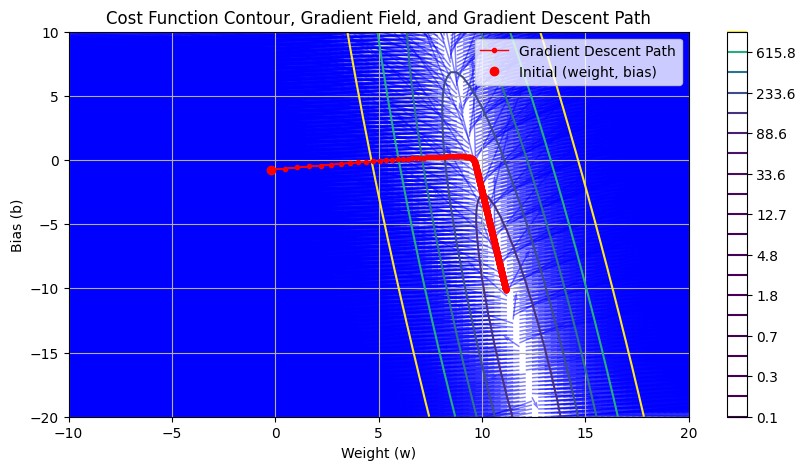

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming x and y_data are your input features and target values respectively

# Define the linear model
def linear_model(x, w, b):
    return w * x + b

# Define the loss function (Mean Squared Error)
def mse_loss(y_pred, y_true):
    return np.mean((y_pred - y_true) ** 2)

# Compute gradients
def compute_gradients(x, y_true, w, b):
    y_pred = linear_model(x, w, b)
    error = y_pred - y_true
    dw = 2 * np.mean(error * x)
    db = 2 * np.mean(error)
    return dw, db

# Gradient Descent parameters
alpha = 0.001  # Learning rate
epochs = 2000  # Number of iterations

# Store parameters for plotting
w_history = [w]
b_history = [b]
loss_history = [mse_loss(linear_model(x, w, b), y_data)]

# Gradient Descent loop
for epoch in range(epochs):
    dw, db = compute_gradients(x, y_data, w, b) 
    w = w - alpha * dw # Update the weight
    b = b - alpha * db # Update the bias

    w_history.append(w) # Add to weight tracker
    b_history.append(b) # Add to bias tracker
    loss_history.append(mse_loss(linear_model(x, w, b), y_data)) # Add overall loss to loss tracker

# Convert history lists to numpy arrays for easier slicing
w_history = np.array(w_history)
b_history = np.array(b_history)

# Create a grid of w and b values for contour and quiver plotting
w_vals = np.linspace(-10, 20, 100)
b_vals = np.linspace(-20, 10, 100)
W, B = np.meshgrid(w_vals, b_vals)

# Compute the loss for each combination of w and b in the grid
Z = np.array([mse_loss(linear_model(x, w, b), y_data) for w, b in zip(np.ravel(W), np.ravel(B))])
Z = Z.reshape(W.shape)

# Compute the gradient field
dW = np.zeros(W.shape)
dB = np.zeros(B.shape)
for i in range(W.shape[0]):
    for j in range(W.shape[1]):
        dw, db = compute_gradients(x, y_data, W[i, j], B[i, j])
        dW[i, j] = dw
        dB[i, j] = db

# Print initial (weight, bias)
print(f'Initial (weight, bias): ({w_history[0]}, {b_history[0]})')
# Print final (weight, bias)
print(f'Final (weight, bias): ({w_history[-1]}, {b_history[-1]})')

# Plot the cost function contour, gradient field, and gradient descent path
plt.figure(figsize=(10, 5))

# Contour plot of the loss function
cp = plt.contour(W, B, Z, levels=np.logspace(-1, 3, 20), cmap='viridis')
plt.colorbar(cp)
plt.xlabel('Weight (w)')
plt.ylabel('Bias (b)')
plt.title('Cost Function Contour, Gradient Field, and Gradient Descent Path')

# Quiver plot of the gradient field
plt.quiver(W, B, dW, dB, angles='xy', scale_units='xy', scale=1, color='blue', alpha=0.5)

# Plot the gradient descent path
plt.plot(w_history, b_history, 'ro-', markersize=3, linewidth=1, label='Gradient Descent Path')
# Plot the initial weight, bias
plt.plot(w_history[0], b_history[0], 'ro', label='Initial (weight, bias)')

# Add arrows to indicate direction of descent
for i in range(1, len(w_history)):
    plt.arrow(w_history[i-1], b_history[i-1],
                w_history[i] - w_history[i-1],
                b_history[i] - b_history[i-1],
                head_width=0.05, head_length=0.1, fc='red', ec='red')

plt.legend()
plt.grid(True)
plt.savefig('gradient-field-2.png')
plt.show()

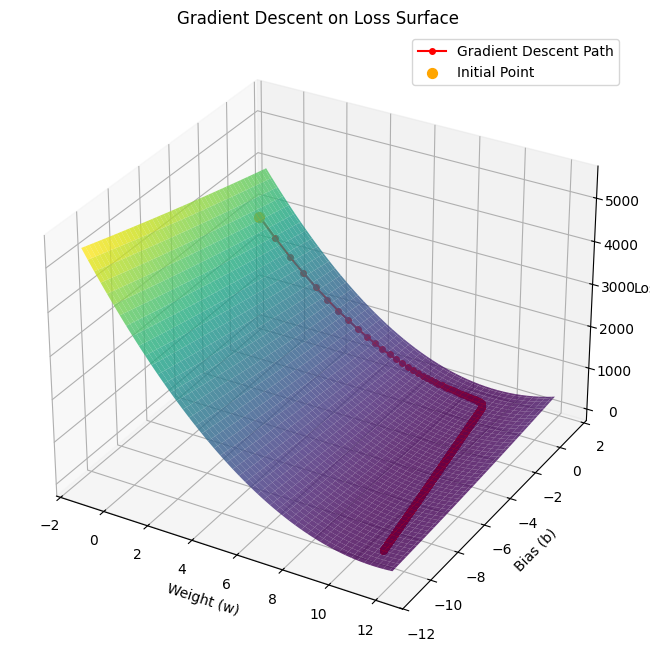

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assuming w_history, b_history, loss_history, x, and y_data are already defined
# Create a grid of w and b values for contour plotting
w_vals = np.linspace(min(w_history) - 1, max(w_history) + 1, 100)
b_vals = np.linspace(min(b_history) - 1, max(b_history) + 1, 100)
W, B = np.meshgrid(w_vals, b_vals)

# Compute the loss for each combination of w and b in the grid
Z = np.array([mse_loss(linear_model(x, w, b), y_data) for w, b in zip(np.ravel(W), np.ravel(B))])
Z = Z.reshape(W.shape)

# Create the figure and 3D axis
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
surf = ax.plot_surface(W, B, Z, cmap='viridis', alpha=0.8)

# Plot the gradient descent path
ax.plot(w_history, b_history, loss_history, color='red', marker='o', markersize=4, label='Gradient Descent Path')

# Highlight the initial point
ax.scatter(w_history[0], b_history[0], loss_history[0], color='orange', s=50, label='Initial Point')

# Add labels and a legend
ax.set_title('Gradient Descent on Loss Surface')
ax.set_xlabel('Weight (w)')
ax.set_ylabel('Bias (b)')
ax.set_zlabel('Loss')
ax.legend()

plt.savefig('gradient-descent-3d.png')
# Show the plot
plt.show()


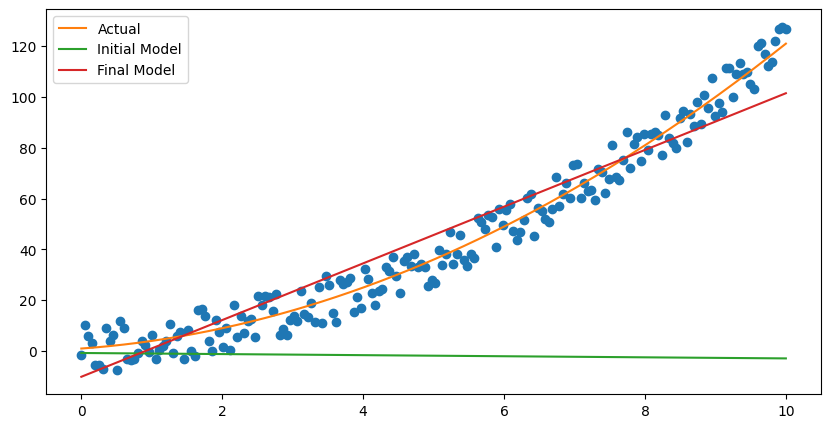

In [11]:
y_initial = [linear_model(p, w_history[0], b_history[0]) for p in x]
y_final = [linear_model(p, w_history[-1], b_history[-1]) for p in x]

plt.figure(figsize=(10, 5))
plt.plot(x, y_data, 'o')
plt.plot(x, y_true, label = 'Actual')
plt.plot(x, y_initial, label='Initial Model')
plt.plot(x, y_final, label='Final Model')
plt.legend()
plt.savefig('final-model.png')
plt.show()

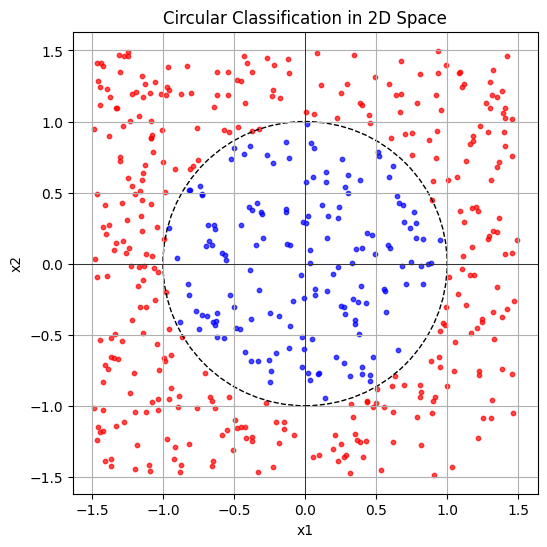

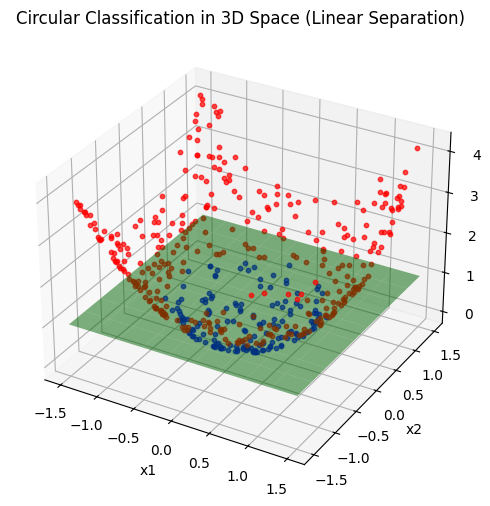

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Generate circular data
np.random.seed(42)
n_samples = 500
radius = 1.0

# Generate random points in 2D space
X = np.random.uniform(-1.5, 1.5, (n_samples, 2))

# Assign class based on distance from origin
y = np.array([1 if np.linalg.norm(point) < radius else 0 for point in X])

# 2D Visualization
fig, ax = plt.subplots(figsize=(6, 6))
for point, label in zip(X, y):
    color = 'blue' if label == 1 else 'red'
    ax.scatter(point[0], point[1], color=color, s=10, alpha=0.7)
circle = plt.Circle((0, 0), radius, color='black', fill=False, linestyle='--')
ax.add_artist(circle)
ax.axhline(0, color='black', linewidth=0.5)
ax.axvline(0, color='black', linewidth=0.5)
ax.set_title("Circular Classification in 2D Space")
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_aspect('equal', adjustable='datalim')
plt.grid()
plt.savefig('circular-data.png')
plt.show()

# Map data to a higher-dimensional space: z = x1^2 + x2^2
z = np.sum(X**2, axis=1).reshape(-1, 1)
X_3D = np.hstack((X, z))

# 3D Visualization
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
for point, label in zip(X_3D, y):
    color = 'blue' if label == 1 else 'red'
    ax.scatter(point[0], point[1], point[2], color=color, s=10, alpha=0.7)
ax.set_title("Circular Classification in 3D Space (Linear Separation)")
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_zlabel("z = x1^2 + x2^2")

# Add a separating plane
xx, yy = np.linspace(-1.5, 1.5, 10), np.linspace(-1.5, 1.5, 10)
XX, YY = np.meshgrid(xx, yy)
ZZ = radius**2 * np.ones_like(XX)
ax.plot_surface(XX, YY, ZZ, alpha=0.5, color='green')
plt.savefig('circular-data-3d.png')
plt.show()


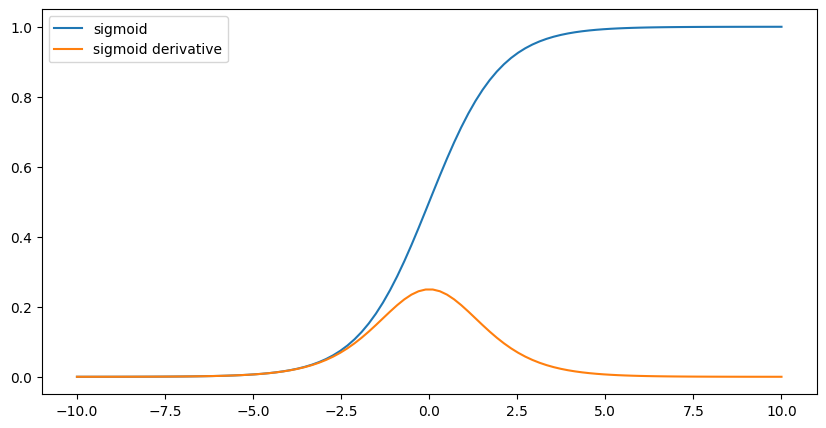

In [17]:
# Activation function and its derivative
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(z):
    return sigmoid(z) * (1 - sigmoid(z))

# Plot 
z = np.linspace(-10, 10, 100)
plt.figure(figsize=(10, 5))
plt.plot(z, sigmoid(z), label='sigmoid')
plt.plot(z, sigmoid_derivative(z), label='sigmoid derivative')
plt.legend()
plt.savefig('sigmoid.png')
plt.show()


Epoch 0, Loss: 1638.6673807594236
Epoch 1000, Loss: 103.2208471378816
Epoch 2000, Loss: 61.6888859179149
Epoch 3000, Loss: 56.39682153646079
Epoch 4000, Loss: 54.36120523445983
Epoch 5000, Loss: 58.60854538607292
Epoch 6000, Loss: 57.47923140860534
Epoch 7000, Loss: 55.84181902963694
Epoch 8000, Loss: 53.32970842304687
Epoch 9000, Loss: 50.00937395054177


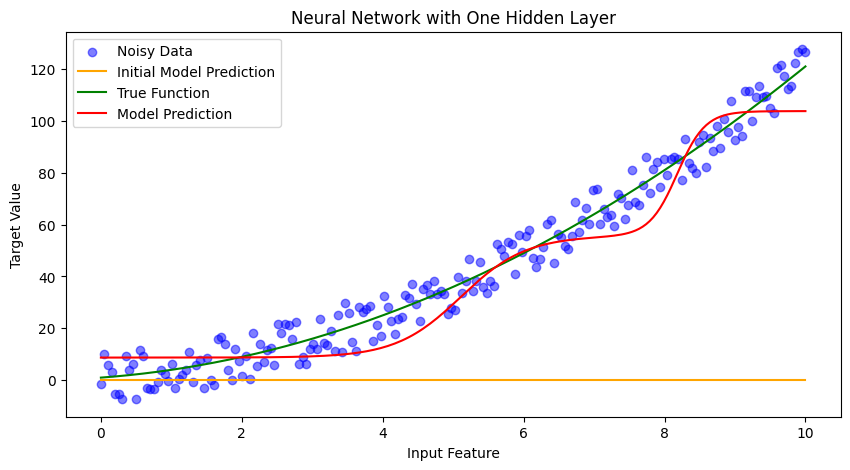

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Reshape data for neural network
x = x.reshape(-1, 1)
y_data = y_data.reshape(-1, 1)

# Initialize parameters
input_dim = x.shape[1]  # Number of input features
hidden_dim = 2         # Number of neurons in the hidden layer
output_dim = y_data.shape[1]  # Number of output neurons

# Weights and biases
np.random.seed(42)
W1 = np.random.randn(input_dim, hidden_dim) * 0.01
b1 = np.zeros((1, hidden_dim))
W2 = np.random.randn(hidden_dim, output_dim) * 0.01
b2 = np.zeros((1, output_dim))

# Fetch initial model predictions
Z1 = np.dot(x, W1) + b1
A1 = sigmoid(Z1)
Z2 = np.dot(A1, W2) + b2
y_pred_initial = Z2

# Learning rate
alpha = 0.01

# Training loop
epochs = 10000
m = x.shape[0]  # Number of training examples
loss_history = []

for epoch in range(epochs):
    # Forward propagation
    Z1 = np.dot(x, W1) + b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(A1, W2) + b2
    y_pred = Z2  # Linear activation for output layer

    # Compute loss (Mean Squared Error)
    loss = (1 / (2 * m)) * np.sum((y_pred - y_data) ** 2)
    loss_history.append(loss)

    # Backward propagation
    dZ2 = y_pred - y_data
    dW2 = (1 / m) * np.dot(A1.T, dZ2)
    db2 = (1 / m) * np.sum(dZ2, axis=0, keepdims=True)
    dA1 = np.dot(dZ2, W2.T)
    dZ1 = dA1 * sigmoid_derivative(Z1)
    dW1 = (1 / m) * np.dot(x.T, dZ1)
    db1 = (1 / m) * np.sum(dZ1, axis=0, keepdims=True)

    # Update parameters
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 =  b2 - alpha * db2

    # Print loss every 1000 epochs
    if epoch % 1000 == 0:
        print(f'Epoch {epoch}, Loss: {loss}')

# Predictions
Z1 = np.dot(x, W1) + b1
A1 = sigmoid(Z1)
Z2 = np.dot(A1, W2) + b2
y_pred = Z2

# Plotting
plt.figure(figsize=(10, 5))
plt.scatter(x, y_data, label='Noisy Data', color='blue', alpha=0.5)
plt.plot(x, y_pred_initial, label='Initial Model Prediction', color='orange')
plt.plot(x, y_true, label='True Function', color='green')
plt.plot(x, y_pred, label='Model Prediction', color='red')
plt.xlabel('Input Feature')
plt.ylabel('Target Value')
plt.title('Neural Network with One Hidden Layer')
plt.legend()
plt.savefig('neural-network1.png')
plt.show()


Epoch 0, Loss: 1640.9238288719946
Epoch 1000, Loss: 51.000043262079124
Epoch 2000, Loss: 34.635437754998655
Epoch 3000, Loss: 28.013732425521553
Epoch 4000, Loss: 24.80182540169102
Epoch 5000, Loss: 22.862125518622207
Epoch 6000, Loss: 21.511763189680025
Epoch 7000, Loss: 20.54430494330906
Epoch 8000, Loss: 19.839340035870396
Epoch 9000, Loss: 19.305798344202046


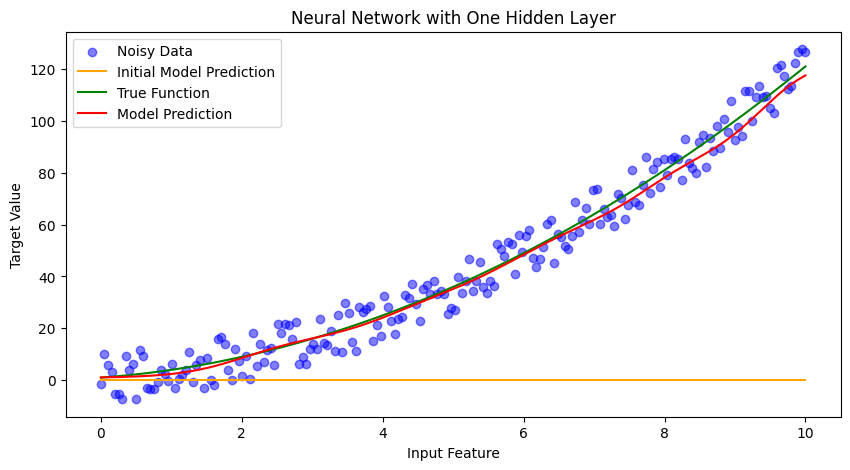

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Reshape data for neural network
x = x.reshape(-1, 1)
y_data = y_data.reshape(-1, 1)

# Initialize parameters
input_dim = x.shape[1]  # Number of input features
hidden_dim = 10         # Number of neurons in the hidden layer
output_dim = y_data.shape[1]  # Number of output neurons

# Weights and biases
np.random.seed(42)
W1 = np.random.randn(input_dim, hidden_dim) * 0.01
b1 = np.zeros((1, hidden_dim))
W2 = np.random.randn(hidden_dim, output_dim) * 0.01
b2 = np.zeros((1, output_dim))

# Fetch initial model predictions
Z1 = np.dot(x, W1) + b1
A1 = sigmoid(Z1)
Z2 = np.dot(A1, W2) + b2
y_pred_initial = Z2

# Learning rate
alpha = 0.01

# Training loop
epochs = 10000
m = x.shape[0]  # Number of training examples
loss_history = []

for epoch in range(epochs):
    # Forward propagation
    Z1 = np.dot(x, W1) + b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(A1, W2) + b2
    y_pred = Z2  # Linear activation for output layer

    # Compute loss (Mean Squared Error)
    loss = (1 / (2 * m)) * np.sum((y_pred - y_data) ** 2)
    loss_history.append(loss)

    # Backward propagation
    dZ2 = y_pred - y_data
    dW2 = (1 / m) * np.dot(A1.T, dZ2)
    db2 = (1 / m) * np.sum(dZ2, axis=0, keepdims=True)
    dA1 = np.dot(dZ2, W2.T)
    dZ1 = dA1 * sigmoid_derivative(Z1)
    dW1 = (1 / m) * np.dot(x.T, dZ1)
    db1 = (1 / m) * np.sum(dZ1, axis=0, keepdims=True)

    # Update parameters
    W1 -= alpha * dW1
    b1 -= alpha * db1
    W2 -= alpha * dW2
    b2 -= alpha * db2

    # Print loss every 1000 epochs
    if epoch % 1000 == 0:
        print(f'Epoch {epoch}, Loss: {loss}')

# Predictions
Z1 = np.dot(x, W1) + b1
A1 = sigmoid(Z1)
Z2 = np.dot(A1, W2) + b2
y_pred = Z2

# Plotting
plt.figure(figsize=(10, 5))
plt.scatter(x, y_data, label='Noisy Data', color='blue', alpha=0.5)
plt.plot(x, y_pred_initial, label='Initial Model Prediction', color='orange')
plt.plot(x, y_true, label='True Function', color='green')
plt.plot(x, y_pred, label='Model Prediction', color='red')
plt.xlabel('Input Feature')
plt.ylabel('Target Value')
plt.title('Neural Network with One Hidden Layer')
plt.legend()
plt.savefig('neural-network2.png')
plt.show()
